# Hypothesis Testing

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

1. Has the network latency gone up since we switched internet service providers?

    - Null Hyp: New network lantency is > old network latency
    - Alt Hyp: New network lantency <= old network lantency
    
        - True positive: Trial result  identify that new network lantency is increased (becoming greater that old network lantency), and result match initial Hypothesis.

        - True negative: Trial result  identify that new network lantency is increased (becoming greater that old network lantency), and result don't match initial Hypothesis.

        - False negative: Trial result  identify that new network lantency is decreased (becoming less that old network lantency), and result don't match initial Hypothesis.
        - False positive: Trial result  identify that new network lantency is decreased (becoming less that old network lantency), and result match initial Hypothesis

2. Is the website redesign any good?
    - Null Hyp: Website redesign is > old website design.
    - Alt Hyp: Website redesign is <= old website design
        - True positive: Trial result identify website redesign is better (being better than old website design) and match the initial hypothesis.
        - True negative: Trial result identify website redesign is better (being better than old website design) and don't match the initial hypothesis.
        - False positive: Trial result identify website redesign is worst (being less than than old website design) and match the initial hypothesis.
        - False negative: Trial result identify website redesign is worst (being less than than old website design) and don't match the initial hypothesis.

## Compairing the mean

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pydataset as datasets

np.random.seed(234)

1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?
    - Since I am comparing **one** observed mean to a theoretical mean (mean of all the data), I need to use the **`One Sample T-Test`**.
- Are adults who drink milk taller than adults who dont drink milk?
    - Because I am comparing **two** observed means (independent samples), I will use the **`Two Sample T-Test`** or the ***`Independent T-Test`*.
- Is the the price of gas higher in texas or in new mexico?
    - Because I am comparing **two** observed means (independent samples), I will use the **`Two Sample T-Test`** or the ***`Independent T-Test`*.
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
    - Because I am comparing **Three** observed means (independent samples), I will use the **`ANOVA Analysis of Varience`**.

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [19]:
# smaple number 1
sales1 =40
sales1_mean = 90
sales1_std = 15

# smape number 2
sales2 =50
sales2_mean = 100
sales2_std = 20

Question: whether the average time it takes to sell homes is different for its two offices.

**Step 1: Plot the distributions**

(array([2., 5., 3., 5., 5., 5., 3., 6., 3., 3.]),
 array([ 59.99690228,  65.47975861,  70.96261495,  76.44547128,
         81.92832761,  87.41118395,  92.89404028,  98.37689661,
        103.85975295, 109.34260928, 114.82546561]),
 <BarContainer object of 10 artists>)

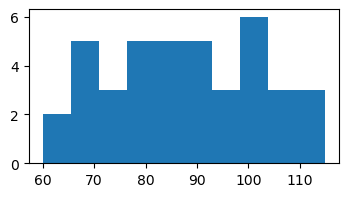

In [20]:
sales1_distribution = stats.norm(sales1_mean, sales1_std)
sales1_sample_distribution = sales1_distribution.rvs(sales1)

plt.figure(figsize=(4,2))
plt.hist(sales1_sample_distribution)

(array([ 4.,  5., 12.,  9.,  7.,  6.,  3.,  3.,  0.,  1.]),
 array([ 65.43683318,  73.913027  ,  82.38922083,  90.86541465,
         99.34160847, 107.81780229, 116.29399611, 124.77018993,
        133.24638375, 141.72257757, 150.19877139]),
 <BarContainer object of 10 artists>)

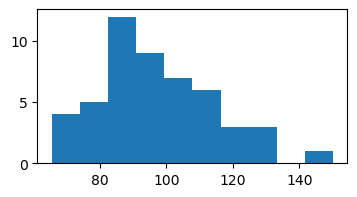

In [22]:
sales2_distribution = stats.norm(sales2_mean, sales2_std)
sales2_sample_distribution = sales2_distribution.rvs(sales2)

plt.figure(figsize=(4,2))
plt.hist(sales2_sample_distribution)

**Step 2: Estabish Hypothesis**

In [92]:
# look at there mean
sales1_distribution.mean(), sales2_distribution.mean()

(90.0, 100.0)

I will decide my null hypothesis bases on the distributions and the mean.
- Null Hypothesis: The average time it takes to sell office one <= the average time it takes to sell office 2
- Alternate Hypothesis: The average time it takes to sell office one > the average time it takes to sell office 2

**Step 3: Set Significant level**
- 0.05 for 95% accuracy

In [38]:
Alpha = 0.05

**Step 4: Verify Assumptions**
- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)

**Step 5: Compute test statistic and probability (t-statistic & p-value) using**

In [34]:
# impliment the two sample T-Test for our example
# Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).

t_stats,p_value = stats.levene(sales1_sample_distribution,sales2_sample_distribution)
t_stats,p_value

(0.8377401736416131, 0.36254515991172875)

With my `p_value` being greater the the `Alpha`, It shows that the **varience are equal** in the two groups.

**Decide**

In [39]:
if (t_stats > 0) and (p_value < Alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


3. Load the mpg dataset and use it to answer the following questions:

- Do manual cars get better gas mileage than automatic cars?

In [86]:
mpg = datasets.data("mpg")
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


In [87]:
mpg["total_miles"] = mpg["cty"] + mpg["hwy"]
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total_miles
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51


**Step 1**

(array([ 1.,  2.,  3., 15., 17., 19., 27., 22.,  6.,  5.]),
 array([ 9.43496721, 14.94102051, 20.44707381, 25.95312711, 31.45918041,
        36.96523371, 42.47128701, 47.97734031, 53.48339361, 58.98944691,
        64.49550021]),
 <BarContainer object of 10 artists>)

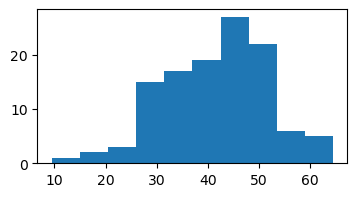

In [88]:
# retreive only the total miles column
cars1 = mpg[mpg["year"] == 2008].total_miles

# get mean and standard deviation to create the normal distribution
cars1_mean, cars1_std = cars1.mean(), cars1.std()

# get normal distribution
cars1_dristribution = stats.norm(cars1_mean, cars1_std)
cars1_sample_dristribution = cars1_dristribution.rvs(len(cars1))

# visual
plt.figure(figsize=(4,2))
plt.hist(cars1_sample_dristribution)

(array([ 2.,  5.,  8., 24., 14., 26., 16., 10., 10.,  2.]),
 array([16.80129264, 21.32347593, 25.84565922, 30.36784251, 34.8900258 ,
        39.41220909, 43.93439239, 48.45657568, 52.97875897, 57.50094226,
        62.02312555]),
 <BarContainer object of 10 artists>)

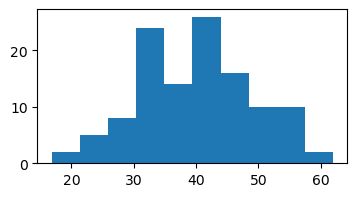

In [89]:
cars2 = mpg[mpg["year"] == 1999].total_miles

# get mean and standard deviation to create the normal distribution
cars2_mean, cars2_std = cars2.mean(), cars2.std()

# get normal distribution
cars2_dristribution = stats.norm(cars2_mean, cars2_std)
cars2_sample_dristribution = cars2_dristribution.rvs(len(cars2))

# visual
plt.figure(figsize=(4,2))
plt.hist(cars2_sample_dristribution)

**Step 2**

In [91]:
# look at there mean
cars1_dristribution.mean(), cars2_dristribution.mean()

(40.15384615384615, 40.44444444444444)

I will decide my null hypothesis bases on the distributions and the mean.
- Null Hypothesis: Their is no significant difference in flue efficiency between 2008 cars and 1999 cars.
- Alternate Hypothesis: Their is a significant difference in flue efficiency between 2008 cars and 1999 cars.

**Step 3: Set Significant level**
- 0.05 for 95% accuracy

In [93]:
Alpha = 0.05

**Step 4: Verify Assumptions**
- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)

**Step 5: Compute test statistic and probability (t-statistic & p-value) using**

In [94]:
# impliment the two sample T-Test for our example
# Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).

t_stats,p_value = stats.levene(cars1_sample_dristribution,cars2_sample_dristribution)
t_stats,p_value

(1.0386407588243165, 0.30919938727511365)

With my `p_value` being greater the the `Alpha`, It shows that the **varience are equal** in the two groups.

**Decide**

In [95]:
if (t_stats > 0) and (p_value < Alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


b. Are compact cars more fuel-efficient than the average car?